In [1]:
!python -m pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from itertools import product
from tqdm import tqdm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('sunspots.dat', delimiter='\t')
# media = df['time'].mean()
# desvio_padrao = df['time'].std()

# print(media, desvio_padrao)

# # Aplique a normalização Z-Score à coluna
# vetor_norm = (df['time'] - media) / desvio_padrao
# print(vetor_norm)

value_media = df['value'].mean()
value_desvio_padrao = df['value'].std()

# Aplique a normalização Z-Score à coluna
df['value'] = (df['value']) / df['value'].max()
# df['value'] = (df['value'] - value_media) / value_desvio_padrao
df

,time,value
0,1749.000000,0.228526
1,1749.083333,0.246651
2,1749.166667,0.275808
3,1749.250000,0.219464
4,1749.333333,0.334909
...,...,...
3172,2013.333333,0.310087
3173,2013.416667,0.206856
3174,2013.500000,0.224586
3175,2013.583333,0.260047


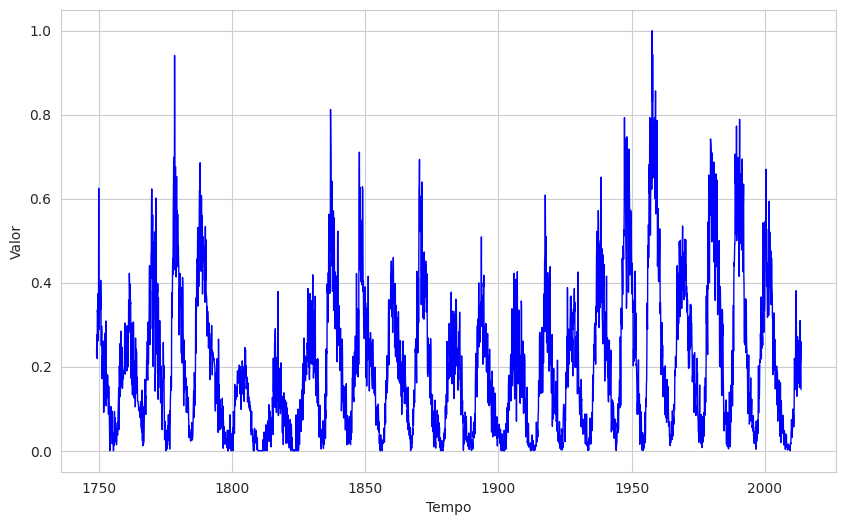

In [4]:
df['value'] = df['value'].astype(float)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['value'], color='blue', linewidth=1)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.savefig('SerieTemporal.png')
plt.show()

In [5]:
# value_media = df['value'].mean()
# value_desvio_padrao = df['value'].std()

# # Aplique a normalização Z-Score à coluna
# df['value'] = (df['value']) / df['value'].max()
# # df['value'] = (df['value'] - value_media) / value_desvio_padrao
# df

In [6]:
# from scipy.stats import zscore
# df = df.apply(zscore)

# df

In [7]:
'''tem_repetidos = df['time_zscore'].duplicated().any()

if tem_repetidos:
    print("Existem números repetidos na coluna.")
else:
    print("Não existem números repetidos na coluna.")'''

'tem_repetidos = df[\'time_zscore\'].duplicated().any()\n\nif tem_repetidos:\n    print("Existem números repetidos na coluna.")\nelse:\n    print("Não existem números repetidos na coluna.")'

In [8]:
#Divisao treino/teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

#AR
model_ar = AutoReg(train['value'], lags=250)
fit_ar = model_ar.fit()
predictions_ar = fit_ar.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

#ARIMA
model_arima = ARIMA(train['value'], order=(3,0,5), seasonal_order=(0,0,0,0))
fit_arima = model_arima.fit()
predictions_arima = fit_arima.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False, typ='levels')


#SARIMAX (ARMA)
model_arma = SARIMAX(train['value'], order=(3,0,5), seasonal_order=(0,0,0,0))
fit_arma = model_arma.fit()
predictions_arma = fit_arma.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


# Cálculo das métricas
mse_ar = mean_squared_error(test['value'], predictions_ar)
mae_ar = mean_absolute_error(test['value'], predictions_ar)

mse_arima = mean_squared_error(test['value'], predictions_arima)
mae_arima = mean_absolute_error(test['value'], predictions_arima)

mse_arma = mean_squared_error(test['value'], predictions_arma)
mae_arma = mean_absolute_error(test['value'], predictions_arma)


/home/iza/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.36602D+00    |proj g|=  1.91004D-01


 This problem is unconstrained.



At iterate    5    f= -1.36609D+00    |proj g|=  1.25529D-01

At iterate   10    f= -1.36618D+00    |proj g|=  1.94305D-02

At iterate   15    f= -1.36621D+00    |proj g|=  1.17270D-02

At iterate   20    f= -1.36621D+00    |proj g|=  9.67601D-03

At iterate   25    f= -1.36621D+00    |proj g|=  6.11218D-04

At iterate   30    f= -1.36621D+00    |proj g|=  6.31291D-03

At iterate   35    f= -1.36621D+00    |proj g|=  9.07869D-03

At iterate   40    f= -1.36623D+00    |proj g|=  2.70512D-02

At iterate   45    f= -1.36623D+00    |proj g|=  1.83120D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     56   

In [9]:
# Cálculo das métricas
mse_ar = mean_squared_error(test['value'], predictions_ar)
mae_ar = mean_absolute_error(test['value'], predictions_ar)

mse_arima = mean_squared_error(test['value'], predictions_arima)
mae_arima = mean_absolute_error(test['value'], predictions_arima)

mse_arma = mean_squared_error(test['value'], predictions_arma)
mae_arma = mean_absolute_error(test['value'], predictions_arma)

# Exibindo as métricas
print(f'Métricas para o modelo AR: MSE = {mse_ar:.2f}, MAE = {mae_ar:.2f}')
print(f'Métricas para o modelo ARIMA: MSE = {mse_arima:.2f}, MAE = {mae_arima:.2f}')
print(f'Métricas para o modelo ARMA: MSE = {mse_arma:.2f}, MAE = {mae_arma:.2f}')

Métricas para o modelo AR: MSE = 0.02, MAE = 0.12
Métricas para o modelo ARIMA: MSE = 0.04, MAE = 0.17
Métricas para o modelo ARMA: MSE = 0.07, MAE = 0.21


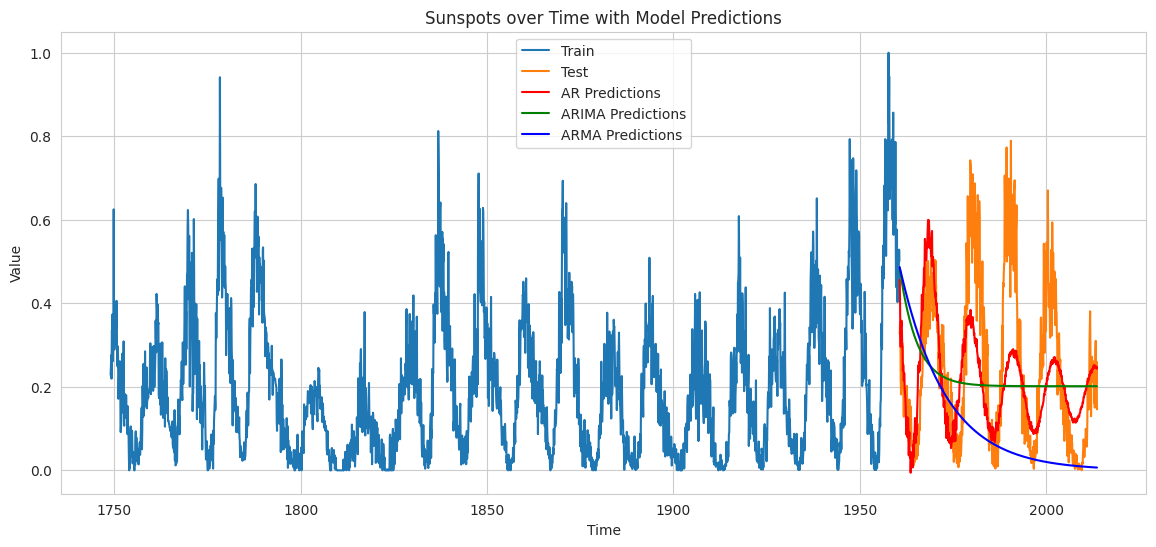

In [10]:
plt.figure(figsize=(14,6))
plt.plot(train['time'], train['value'], label='Train')
plt.plot(test['time'], test['value'], label='Test')
plt.plot(test['time'], predictions_ar, label='AR Predictions', color='red')
plt.plot(test['time'], predictions_arima, label='ARIMA Predictions', color='green')
plt.plot(test['time'], predictions_arma, label='ARMA Predictions', color='blue')
plt.title('Sunspots over Time with Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('predicoes.png')
plt.show()